<a href="https://colab.research.google.com/github/IshanSrivastav/GOOGLE_DATA_ANALYTICS/blob/main/Bellabeat_Case_Study_with_R(Google_Capstone).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S R
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

DATA_SOURCE_MAPPING = 'fitbit:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1041311%2F7746251%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20250429%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20250429T150308Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D32eb86ba6a1475e7e0712294925ef8fad98112a078bf4c63914c4edcb46298efcbcf86c6ce456a3e12dd4864fbc89d16bf4b14722e87b3299ddf0e532dda48ec161b498b9373087453333ded9aaad474c0bba14d6aef6a6545cc2027869d8a9673a229debd112ecaded1fcd9d9b66c160c27715eb35576db184e5f1c67fd844337b9ec6163b718efee6a4a61d405832803bdcb2772f32b21cc17cbeec3f55f549e89c170a62c499599494f028298c9db8295a4389c1430db14ab8fcdf5fb7d036e9c655fe3ebf355034c65429a76f47763d1d499a8b609a880dc3d2682f212772787d63f3a4ffb33512fbc6878840dc4577c667c90ac158a81437eeca0cfad9c'

KAGGLE_INPUT_PATH = '/kaggle/input'
KAGGLE_WORKING_PATH = '/kaggle/working'

system(paste0('sudo umount ', '/kaggle/input'))
system(paste0('sudo rmdir ', '/kaggle/input'))
system(paste0('sudo mkdir -p -- ', KAGGLE_INPUT_PATH), intern=TRUE)
system(paste0('sudo chmod 777 ', KAGGLE_INPUT_PATH), intern=TRUE)
system(
  paste0('sudo ln -sfn ', KAGGLE_INPUT_PATH,' ',file.path('..', 'input')),
  intern=TRUE)

system(paste0('sudo mkdir -p -- ', KAGGLE_WORKING_PATH), intern=TRUE)
system(paste0('sudo chmod 777 ', KAGGLE_WORKING_PATH), intern=TRUE)
system(
  paste0('sudo ln -sfn ', KAGGLE_WORKING_PATH, ' ', file.path('..', 'working')),
  intern=TRUE)

data_source_mappings = strsplit(DATA_SOURCE_MAPPING, ',')[[1]]
for (data_source_mapping in data_source_mappings) {
    path_and_url = strsplit(data_source_mapping, ':')
    directory = path_and_url[[1]][1]
    download_url = URLdecode(path_and_url[[1]][2])
    filename = sub("\\?.+", "", download_url)
    destination_path = file.path(KAGGLE_INPUT_PATH, directory)
    print(paste0('Downloading and uncompressing: ', directory))
    if (endsWith(filename, '.zip')){
      temp = tempfile(fileext = '.zip')
      download.file(download_url, temp)
      unzip(temp, overwrite = TRUE, exdir = destination_path)
      unlink(temp)
    }
    else{
      temp = tempfile(fileext = '.tar')
      download.file(download_url, temp)
      untar(temp, exdir = destination_path)
      unlink(temp)
    }
    print(paste0('Downloaded and uncompressed: ', directory))
}

print(paste0('Data source import complete'))


character(0)

character(0)

character(0)

character(0)

character(0)

character(0)

[1] "Downloading and uncompressing: fitbit"
[1] "Downloaded and uncompressed: fitbit"
[1] "Data source import complete"


#### Note:
This Bellabeat Capstone Project has been completed with the help of insights from Kaggle notebooks, Gen AI tools, Google Docs, and course materials. Special thanks to the Kaggle community and referenced works for their valuable contributions. While the project is complete, continuous improvements and refinements are always welcome.

## About Bellabeat

Bellabeat, founded in 2013 by Urška Sršen and Sando Mur, is a wellness tech company creating smart devices that help women track their health, including activity, sleep, stress, and reproductive patterns. Known for its elegant designs and global reach, Bellabeat uses digital marketing and consumer data insights to drive growth and refine its strategies.

### Business Task
Analyze smart device usage data to uncover trends among non-Bellabeat users.
Apply these insights to one Bellabeat product and suggest strategies to improve Bellabeat’s marketing efforts.

### Key Questions
1) What are some trends in smart device usage?

2) How could these trends apply to Bellabeat customers?

3) How could these trends help influence Bellabeat’s marketing strategy?

# Install and load relevant library's

In [2]:
library(tidyverse)
library(lubridate)
library(dplyr)  # Make sure you have dplyr loaded for n_distinct()
library(ggplot2)
library(tidyr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# Prepare Data
Key tasks
 1. Download data and store it appropriately.
 2. Identify how it’s organized.
 3. Sort and Filter the data.
 4. Determine the credibility of the data.

#####################
## Load your CSV files Or Data (FITBIT)
#####################




Create a dataframe named 'daily_activity' and read in one
of the CSV files from the dataset. Remember, you can name your dataframe
something different, and you can also save your CSV file under a different name as well.

In [3]:
daily_activity <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")

# Create another dataframe for the sleep data repeat the same accordingly to your data.

sleep_day <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")

hourly_Calories <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv")

hourly_Intensities <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")

 weight_loginfo <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")

# weight_loginfo <- read.csv("weightLogInfo_merged.csv") -> steps if importing in an offline env


#########################
## Explore a few key tables ##
#########################

In [4]:
# Take a look at the daily_activity data.
head(daily_activity)
head(hourly_Calories)
head(hourly_Intensities)
head(weight_loginfo)
# Take a look at the sleep_day data.
head(sleep_day)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


,Id,ActivityHour,Calories
,<dbl>,<chr>,<int>
1,1503960366,4/12/2016 12:00:00 AM,81
2,1503960366,4/12/2016 1:00:00 AM,61
3,1503960366,4/12/2016 2:00:00 AM,59
4,1503960366,4/12/2016 3:00:00 AM,47
5,1503960366,4/12/2016 4:00:00 AM,48
6,1503960366,4/12/2016 5:00:00 AM,48


,Id,ActivityHour,TotalIntensity,AverageIntensity
,<dbl>,<chr>,<int>,<dbl>
1,1503960366,4/12/2016 12:00:00 AM,20,0.333333
2,1503960366,4/12/2016 1:00:00 AM,8,0.133333
3,1503960366,4/12/2016 2:00:00 AM,7,0.116667
4,1503960366,4/12/2016 3:00:00 AM,0,0.000000
5,1503960366,4/12/2016 4:00:00 AM,0,0.000000
6,1503960366,4/12/2016 5:00:00 AM,0,0.000000


,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
,<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<dbl>
1,1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,True,1.462234e+12
2,1503960366,5/3/2016 11:59:59 PM,52.6,115.9631,NA,22.65,True,1.462320e+12
3,1927972279,4/13/2016 1:08:52 AM,133.5,294.3171,NA,47.54,False,1.460510e+12
4,2873212765,4/21/2016 11:59:59 PM,56.7,125.0021,NA,21.45,True,1.461283e+12
5,2873212765,5/12/2016 11:59:59 PM,57.3,126.3249,NA,21.69,True,1.463098e+12
6,4319703577,4/17/2016 11:59:59 PM,72.4,159.6147,25,27.45,True,1.460938e+12


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<chr>,<int>,<int>,<int>
1,1503960366,4/12/2016 12:00:00 AM,1,327,346
2,1503960366,4/13/2016 12:00:00 AM,2,384,407
3,1503960366,4/15/2016 12:00:00 AM,1,412,442
4,1503960366,4/16/2016 12:00:00 AM,2,340,367
5,1503960366,4/17/2016 12:00:00 AM,1,700,712
6,1503960366,4/19/2016 12:00:00 AM,1,304,320


In [5]:
# Identify all the columns in the daily_activity data.
colnames(daily_activity)
# Identify all the columns in the daily_activity data same can be done for other data too.
colnames(sleep_day)

[1] "Id"                       "ActivityDate"            
 [3] "TotalSteps"               "TotalDistance"           
 [5] "TrackerDistance"          "LoggedActivitiesDistance"
 [7] "VeryActiveDistance"       "ModeratelyActiveDistance"
 [9] "LightActiveDistance"      "SedentaryActiveDistance" 
[11] "VeryActiveMinutes"        "FairlyActiveMinutes"     
[13] "LightlyActiveMinutes"     "SedentaryMinutes"        
[15] "Calories"

[1] "Id"                 "SleepDay"           "TotalSleepRecords" 
[4] "TotalMinutesAsleep" "TotalTimeInBed"

# Process
 Key tasks
 1. Check the data for errors.
 2. Choose your tools.
 3. Transform the data so you can work with it effectively.
 4. Document the cleaning process.


#  Fixing Date and Time formatting for all datasets

In [6]:
# I spotted some problems with the timestamp data. So before analysis, I need to convert it to date time format and split to date and time.

# 1. hourly_Intensities--

hourly_Intensities$ActivityHour <- as.POSIXct(hourly_Intensities$ActivityHour, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
hourly_Intensities$time <- format(hourly_Intensities$ActivityHour, format="%H:%M:%S")
hourly_Intensities$date <- format(hourly_Intensities$ActivityHour, format="%m/%d/%y")

# 2. hourly_Calories--

hourly_Calories$ActivityHour <- as.POSIXct(hourly_Calories$ActivityHour, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
hourly_Calories$time <- format(hourly_Calories$ActivityHour, format="%H:%M:%S")
hourly_Calories$date <- format(hourly_Calories$ActivityHour, format="%m/%d/%y")

# 3. daily_activity--

daily_activity$ActivityDate <- as.POSIXct(daily_activity$ActivityDate, format="%m/%d/%Y", tz=Sys.timezone())
daily_activity$date <- format(daily_activity$ActivityDate, format="%m/%d/%y")

# 4. sleep_day--

sleep_day$SleepDay <- as.POSIXct(sleep_day$SleepDay, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
sleep_day$date <- format(sleep_day$SleepDay, format="%m/%d/%y")

# 5. weight_loginfo--

weight_loginfo$Date <- as.POSIXct(weight_loginfo$Date, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
weight_loginfo$time <- format(weight_loginfo$Date, format="%H:%M:%S")
weight_loginfo$date <- format(weight_loginfo$Date, format="%m/%d/%y")

# This code will:  Convert all your timestamp columns properly to POSIXct.
# Creates separate date and time columns wherever needed.
# Now The data is super clean for analysis, filtering, grouping, plotting, etc.

Note that all the datasets have the 'Id' field - this can be used to merge the datasets.

# Analyze
Key tasks
 1. Aggregate your data so it’s useful and accessible.
 2. Organize and format your data.
 3. Peform calculations.
 4. Identify trends and relationships.

#####################################
## Understanding some summary statistics
#####################################

In [7]:
# Counting distinct users (Id) in each dataset
n_distinct(daily_activity$Id)
n_distinct(sleep_day$Id)

[1] 33

[1] 24

In [8]:
# If we want a quick table to see all the counts at once, we can do this:
data.frame(
  Dataset = c("Daily Activity", "Hourly Calories", "Hourly Intensities", "Sleep Day", "Weight Log Info"),
  Unique_Users = c(
    n_distinct(daily_activity$Id),
    n_distinct(hourly_Calories$Id),
    n_distinct(hourly_Intensities$Id),
    n_distinct(sleep_day$Id),
    n_distinct(weight_loginfo$Id)
  )
)

# How many unique participants are there in each dataframe?
# 33 In Daily Activity, Hourly Calories & Hourly Intensities
# 24 In Sleep Day & 8 In Weight Log Info which is not significant to make any recommendations or conclutions.
# It looks like there may be more participants in the daily activity dataset than the sleep dataset.


Dataset,Unique_Users
<chr>,<int>
Daily Activity,33
Hourly Calories,33
Hourly Intensities,33
Sleep Day,24
Weight Log Info,8


What are some quick summary statistics we'd want to know about each data frame?

# Summaries

In [9]:
# Daily Activity Summary
cat("\n--- Daily Activity: Steps, Distance, Sedentary Minutes, Calories ---\n")
daily_activity %>%
  select(TotalSteps, TotalDistance, SedentaryMinutes, Calories) %>%
  summary()

# Active Minutes Summary
cat("\n--- Daily Activity: Very/Fairly/Lightly Active Minutes ---\n")
daily_activity %>%
  select(VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes) %>%
  summary()

# Hourly Calories Summary
cat("\n--- Hourly Calories ---\n")
hourly_Calories %>%
  select(Calories) %>%
  summary()

# Sleep Data Summary
cat("\n--- Sleep Day: Total Sleep Records, Minutes Asleep, Time in Bed ---\n")
sleep_day %>%
  select(TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed) %>%
  summary()

# Weight Log Info Summary
cat("\n--- Weight Log Info: Weight and BMI ---\n")
weight_loginfo %>%
  select(WeightKg, BMI) %>%
  summary()


--- Daily Activity: Steps, Distance, Sedentary Minutes, Calories ---


   TotalSteps    TotalDistance    SedentaryMinutes    Calories   
 Min.   :    0   Min.   : 0.000   Min.   :   0.0   Min.   :   0  
 1st Qu.: 3790   1st Qu.: 2.620   1st Qu.: 729.8   1st Qu.:1828  
 Median : 7406   Median : 5.245   Median :1057.5   Median :2134  
 Mean   : 7638   Mean   : 5.490   Mean   : 991.2   Mean   :2304  
 3rd Qu.:10727   3rd Qu.: 7.713   3rd Qu.:1229.5   3rd Qu.:2793  
 Max.   :36019   Max.   :28.030   Max.   :1440.0   Max.   :4900  


--- Daily Activity: Very/Fairly/Lightly Active Minutes ---


 VeryActiveMinutes FairlyActiveMinutes LightlyActiveMinutes
 Min.   :  0.00    Min.   :  0.00      Min.   :  0.0       
 1st Qu.:  0.00    1st Qu.:  0.00      1st Qu.:127.0       
 Median :  4.00    Median :  6.00      Median :199.0       
 Mean   : 21.16    Mean   : 13.56      Mean   :192.8       
 3rd Qu.: 32.00    3rd Qu.: 19.00      3rd Qu.:264.0       
 Max.   :210.00    Max.   :143.00      Max.   :518.0       


--- Hourly Calories ---


    Calories     
 Min.   : 42.00  
 1st Qu.: 63.00  
 Median : 83.00  
 Mean   : 97.39  
 3rd Qu.:108.00  
 Max.   :948.00  


--- Sleep Day: Total Sleep Records, Minutes Asleep, Time in Bed ---


 TotalSleepRecords TotalMinutesAsleep TotalTimeInBed 
 Min.   :1.000     Min.   : 58.0      Min.   : 61.0  
 1st Qu.:1.000     1st Qu.:361.0      1st Qu.:403.0  
 Median :1.000     Median :433.0      Median :463.0  
 Mean   :1.119     Mean   :419.5      Mean   :458.6  
 3rd Qu.:1.000     3rd Qu.:490.0      3rd Qu.:526.0  
 Max.   :3.000     Max.   :796.0      Max.   :961.0  


--- Weight Log Info: Weight and BMI ---


    WeightKg           BMI       
 Min.   : 52.60   Min.   :21.45  
 1st Qu.: 61.40   1st Qu.:23.96  
 Median : 62.50   Median :24.39  
 Mean   : 72.04   Mean   :25.19  
 3rd Qu.: 85.05   3rd Qu.:25.56  
 Max.   :133.50   Max.   :47.54  

# Share
 Key tasks
 1. Determine the best way to share your findings.
 2. Create effective data visualizations.
 3. Present your findings.
 4. Ensure your work is accessible.

# Sharing Some Findings

In [10]:
# 1. Daily Step Count:
#    - The minimum step count is 0 steps (likely inactive days).
#    - The maximum step count is 36,019 steps — showing some users are very active.
#    - The median step count is 7,406, and the mean is 7,638, indicating typical daily steps are between 7,000 and 8,000.

# 2. Total Distance Traveled:
#    - Minimum distance is 0 km (on sedentary days).
#    - The maximum distance is 28.03 km, highlighting long-distance days.
#    - The median distance is 5.245 km, and the mean is 5.49 km, showing a typical walking distance of about 5 km daily.

# 3. Sedentary Behavior:
#    - Maximum sedentary minutes is 1,440 minutes (24 hours of sitting).
#    - The median sedentary minutes is 1,057.5, meaning many users remain sedentary for over 17 hours a day.
#    - The mean is 991.2 minutes, showing a trend of significant sedentary behavior.

# 4. Daily Calories Burned:
#    - Maximum calories burned is 4,900, likely due to intense physical activity.
#    - The median calorie expenditure is 2,134, and the mean is 2,304, showing average daily expenditure is between 2,100-2,300 calories.

# 5. Very Active Minutes:
#    - The mean is 21.16 minutes, with a maximum of 210 minutes of intense activity on high-energy days.
#    - The median is 4 minutes, indicating that intense activity is not very frequent for most users.

# 6. Fairly Active Minutes:
#    - The mean is 13.56 minutes, with a maximum of 143 minutes of moderate activity.
#    - The median is 6 minutes, suggesting some users engage in moderate activity but not daily.

# 7. Lightly Active Minutes:
#    - The mean is 192.8 minutes, with a maximum of 518 minutes (entire day of light physical activity).
#    - The median is 199 minutes, indicating most users engage in light activity (e.g., walking or household tasks) for about 3.5-4 hours a day.

# 8. Sleep Duration:
#    - The mean sleep time is 419.5 minutes (~7 hours), and the median is 433 minutes.
#    - The maximum sleep duration is 796 minutes (about 13.2 hours), with some users sleeping significantly more than average.
#    - The minimum is 58 minutes, indicating some outliers or incomplete sleep data.

# 9. Weight and BMI Insights:
#    - The mean weight is 72.04 kg, and the mean BMI is 25.19, indicating many users are in the overweight range (BMI > 25).
#    - The maximum weight is 133.5 kg and maximum BMI is 47.54, showing that some users fall in the obese category.

# 10. Variability Across Users:
#    - There’s a high variability in activity levels: from users who are sedentary for almost the entire day to those who engage in intense physical activities.
#    - Similarly, there’s variability in sleep patterns and weight/BMI, with significant differences across users in terms of daily calorie expenditure, steps, and sleep.



#########################
## Merging Data
#########################

In [11]:
# Before visualizing the data, I need to merge some data sets.
# I’m going to merge with (outer join) activity and sleep on columns Id and date
# (that I previously created after converting Date to date time format).

In [12]:
combined_data <- merge(sleep_day, daily_activity, by=c("Id", "date"), all = TRUE)

n_distinct(combined_data$Id)

head(combined_data)

[1] 33

,Id,date,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<dttm>,<int>,<int>,<int>,<dttm>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,04/12/16,2016-04-12,1,327,346,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,04/13/16,2016-04-13,2,384,407,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,04/14/16,NA,NA,NA,NA,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,04/15/16,2016-04-15,1,412,442,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,04/16/16,2016-04-16,2,340,367,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,04/17/16,2016-04-17,1,700,712,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


#########################
## Visualization
#########################

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 530 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 530 rows containing missing values or values outside the scale range
(`geom_point()`).”


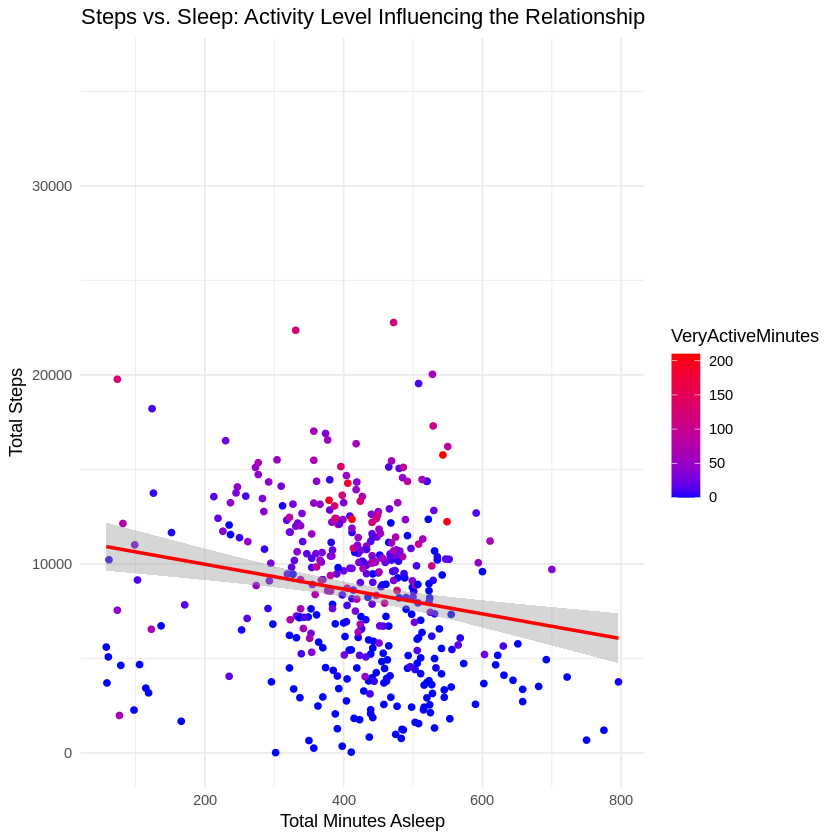

In [13]:
# This Plot checks if activity levels (such as VeryActiveMinutes) influence the relationship between sleep and steps, you can color the points based on activity level

ggplot(data = combined_data, aes(x = TotalMinutesAsleep, y = TotalSteps, color = VeryActiveMinutes)) +
  geom_point() +
  geom_smooth(method = "lm", color = "red") +
  labs(title = "Steps vs. Sleep: Activity Level Influencing the Relationship",
       x = "Total Minutes Asleep",
       y = "Total Steps") +
  theme_minimal() +
  scale_color_gradient(low = "blue", high = "red")

There's slight negative trend as total minutes asleep increases, total steps slightly decreases - although the relationship looks very weak

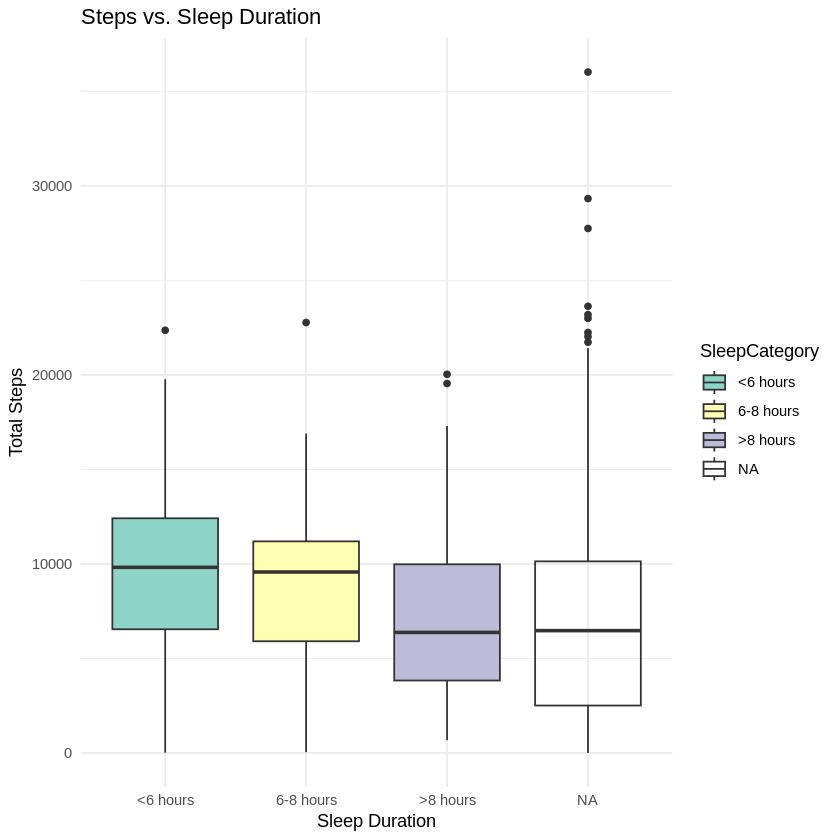

In [14]:
#Categorizing sleep duration
combined_data$SleepCategory <- cut(combined_data$TotalMinutesAsleep,
                                   breaks = c(0, 360, 480, Inf),
                                   labels = c("<6 hours", "6-8 hours", ">8 hours"))

# Plot the distribution of steps across sleep categories
ggplot(data = combined_data, aes(x = SleepCategory, y = TotalSteps, fill = SleepCategory)) +
  geom_boxplot() +
  labs(title = "Steps vs. Sleep Duration",
       x = "Sleep Duration",
       y = "Total Steps") +
  theme_minimal() +
  scale_fill_brewer(palette = "Set3")

•Median steps seem slightly higher for the <6 hours group compared to 6-8 hours and >8 hours.

•People sleeping less than 6 hours might be slightly more active (more steps) on average.

•A lot of variability (spread) exists in all categories — no sleep group is extremely consistent.

•We have quite a few outliers (dots above the whiskers) — people with very high step counts.

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 530 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 530 rows containing missing values or values outside the scale range
(`geom_point()`).”


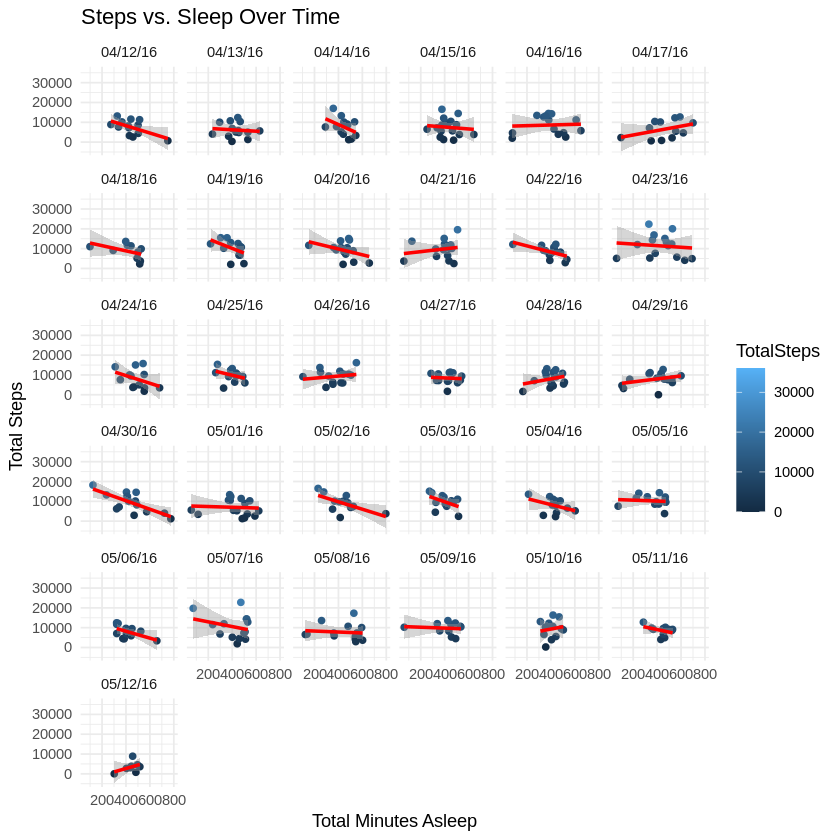

In [15]:
# how sleep and activity data vary over time

ggplot(data = combined_data, aes(x = TotalMinutesAsleep, y = TotalSteps)) +
  geom_point(aes(color = TotalSteps)) +
  geom_smooth(method = "lm", color = "red") +
  labs(title = "Steps vs. Sleep Over Time",
       x = "Total Minutes Asleep",
       y = "Total Steps") +
  theme_minimal() +
  facet_wrap(~ date)

• About The Above Chart, the relationship varies daily — on some days the trend line is almost flat, while on others it slopes more steeply downward.

• There are some days with wide variability in both sleep and step counts, suggesting fluctuations in daily habits.

• Outliers (people with unusually high steps or sleep) are visible on several dates.

• Some issues are present with the data (shown in warning messages), such as missing or invalid rows — likely why a few facets look strange at the bottom

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


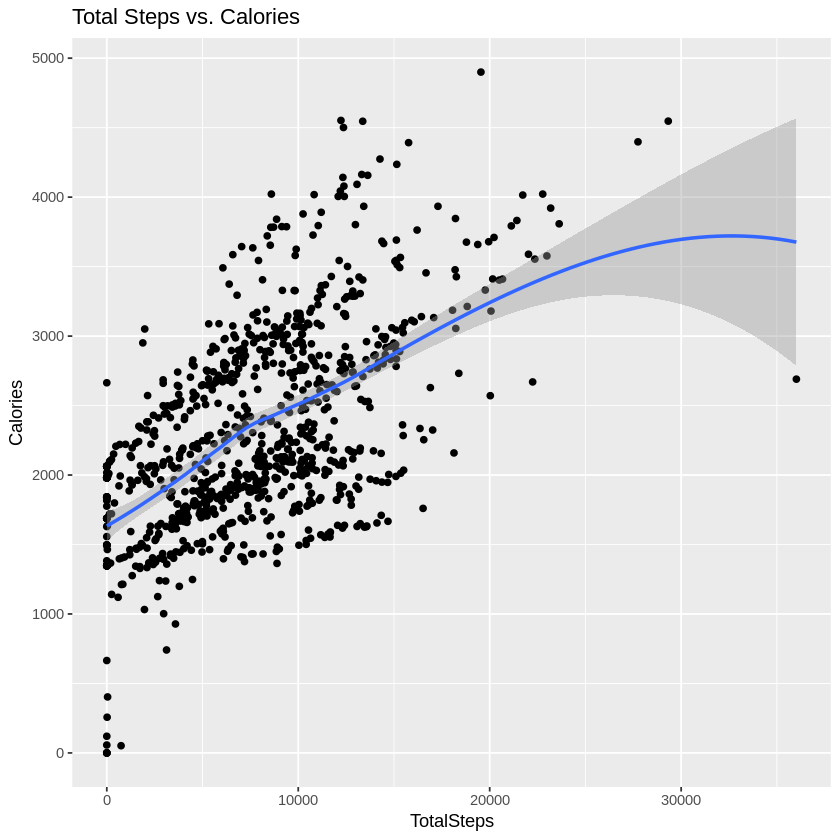

In [16]:
# Total Steps vs. Calories

ggplot(data=daily_activity, aes(x=TotalSteps, y=Calories)) +
  geom_point() + geom_smooth() + labs(title="Total Steps vs. Calories")


There is a strong positive correlation as in above chart:

As Total Steps increase, the number of Calories burned generally increases.

• The relationship is not perfectly linear:

• At lower step counts, calories burned increase sharply with steps.

• After around 20,000 steps, the curve flattens slightly, suggesting diminishing returns — calories still rise, but at a slower rate.

• A few outliers exist at very high step counts (>30,000 steps), but they still follow the general trend.

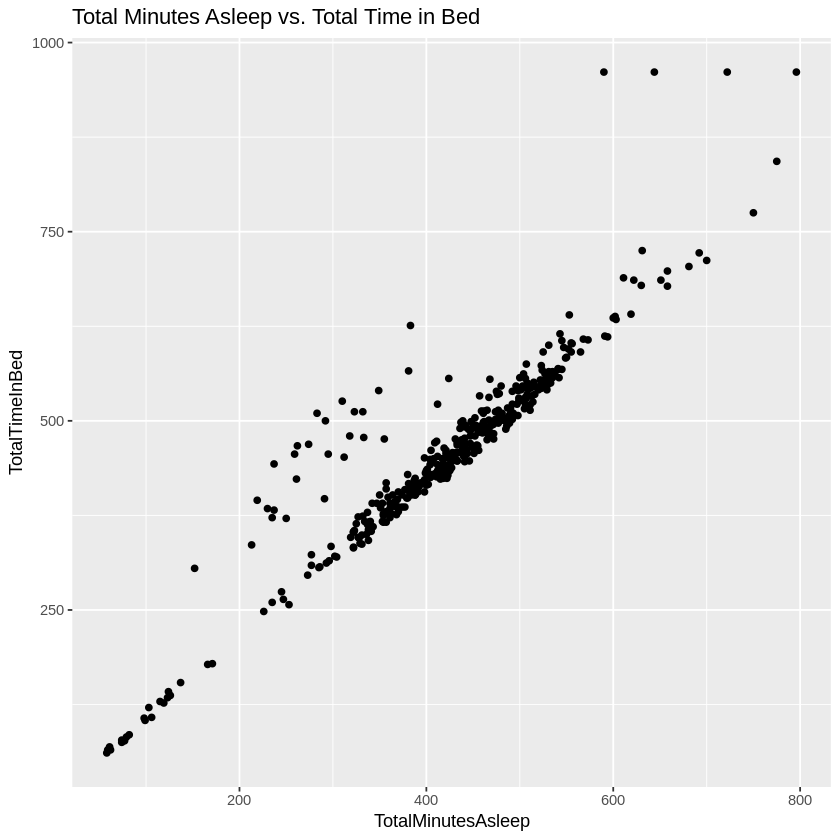

In [17]:
# The relationship between Total Minutes Asleep and Total Time in Bed looks linear.
# So if the Bellabeat users want to improve their sleep, we should consider using notification to go to sleep.

ggplot(data=sleep_day, aes(x=TotalMinutesAsleep, y=TotalTimeInBed)) +
  geom_point()+ labs(title="Total Minutes Asleep vs. Total Time in Bed")

Warning message in geom_histogram(stat = "identity", fill = "darkgreen"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


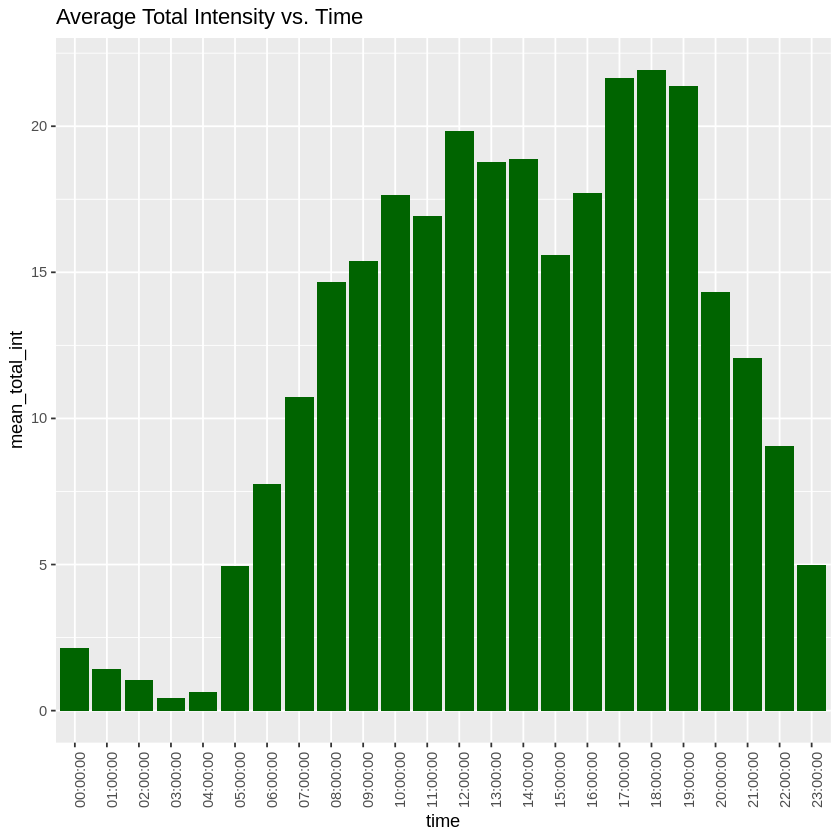

In [18]:
# Let's look at hourly_intensities data over time (hourly).
# Group by 'time', calculate mean total intensity, and remove NA values
int_new <- hourly_Intensities %>%
  group_by(time) %>%
  drop_na() %>%
  summarise(mean_total_int = mean(TotalIntensity, na.rm = TRUE))  # Ensure NA handling during summarization

# Plot the average total intensity vs. time
ggplot(data=int_new, aes(x=time, y=mean_total_int)) +
  geom_histogram(stat = "identity", fill='darkgreen') +  # Use geom_bar() for categorical x-axis
  theme(axis.text.x = element_text(angle = 90)) +  # Rotate x-axis text for better visibility
  labs(title="Average Total Intensity vs. Time")

In The Above Chart Lowest intensity is seen during early morning hours (00:00–05:00 AM), when people are mostly sleeping.

• Activity intensity begins increasing sharply around 6:00 AM and continues rising through the morning.

• Peak activity hours occur between 11:00 AM and 6:00 PM, with the highest intensity around 5:00 PM (17:00).

• After 6:00 PM, the intensity gradually decreases as people start winding down for the day.

• Late night (after 9:00 PM) activity intensity drops significantly again.

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 530 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 530 rows containing missing values or values outside the scale range
(`geom_point()`).”


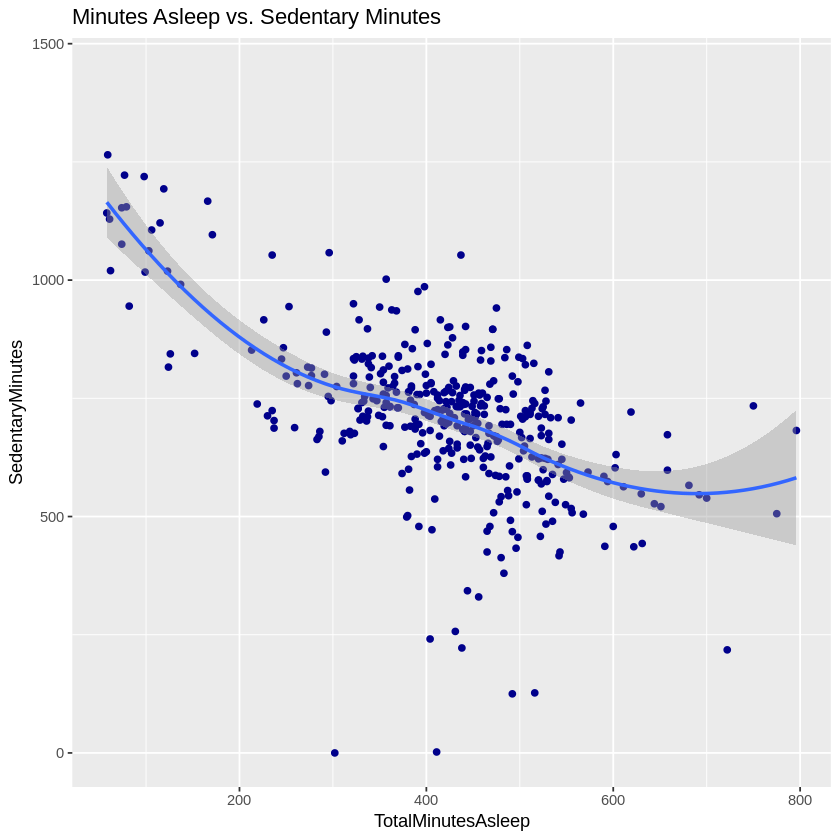

In [19]:
# Let's look at the relationship between Total Minutes Asleep and Sedentry Minutes.

ggplot(data=combined_data, aes(x=TotalMinutesAsleep, y=SedentaryMinutes)) +
  geom_point(color='darkblue') + geom_smooth() +
  labs(title="Minutes Asleep vs. Sedentary Minutes")


In The Above Chart - Negative correlation: As Total Minutes Asleep increases, Sedentary Minutes tend to decrease.

• For people who sleep less (lower total minutes asleep), their sedentary time tends to be higher.

• As sleep improves (around 400–500 minutes asleep, about 6.5–8 hours), sedentary minutes decline.

• After around 500 minutes of sleep, the trend becomes flatter, suggesting that beyond a certain amount of sleep, further increases don’t significantly affect sedentary time.

•There’s more variability (spread) for individuals with lower sleep duration.

# ACT

Guiding questions

● What is your final conclusion based on your analysis?

● How could your team and business apply your insights?

● What next steps would you or your stakeholders take based on your findings?

● Is there additional data you could use to expand on your ndings?

Final Conclusion:

Based on the analysis of daily steps, calories, sleep duration, sedentary minutes, and activity intensity:

•	There is a positive correlation between Total Steps and Calories burned — higher physical activity clearly leads to greater energy expenditure.

•	Sleep appears to affect daily activity: people sleeping less than 6 hours or more than 8 hours show lower step counts compared to those sleeping 6-8 hours.

•	There is a negative relationship between Total Minutes Asleep and Sedentary Minutes: more sleep is linked with reduced sedentary behavior.

•	Activity intensity varies significantly throughout the day, with peak activity levels between 11:00 AM to 6:00 PM, suggesting that interventions to boost movement could be timed around these periods for maximum impact.

How could the team/business apply these insights?

•	Encourage users to aim for 6–8 hours of sleep to maximize their daily physical activity.

•	Develop personalized nudges or notifications around low-activity times (morning or evening) to boost movement.

•	Highlight the connection between sleep, movement, and calories burned in wellness programs to drive user engagement.

•	Tailor fitness plans to optimize steps during peak active hours, leveraging natural daily energy cycles.

Next Steps to Take Based on Findings:

•	Deep dive into anomalies: Investigate users with high sedentary time despite sufficient sleep.

•	Segment analysis: Group users based on sleep patterns and see if different types of interventions are needed.

•	Time-based interventions: Test targeted reminders during less active times to encourage movement.

•	Further validation: Conduct a longitudinal study to see if improving sleep duration directly leads to increased activity levels over weeks or months.

Additional Data to Expand Findings:

•	Heart rate data could help understand the intensity of physical activity more accurately.

•	Activity type logs (e.g., walking, running, sedentary work) could refine the understanding of steps and calorie burn.

•	Diet or nutrition data would allow linking calorie intake and energy expenditure more effectively.

•	User demographics (age, gender, occupation) to see if patterns differ across different groups.